## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Combine the data into a single dataset
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
combine_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")
combine_df.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [6]:
# Checking the number of mice.
len(combine_df["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combine_df.loc[combine_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_combine_df=combine_df[combine_df["Mouse ID"].isin(["g989"]) == False]
clean_combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_combine_df["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_combine_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_combine_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_combine_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_combine_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_combine_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean, "Median" : median, "Variance" : variance, "Standard Deviation" : stdv, "SEM" : sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
.agg

SyntaxError: invalid syntax (<ipython-input-11-4f3917697f01>, line 4)

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

grouped_df = pd.DataFrame(clean_combine_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")


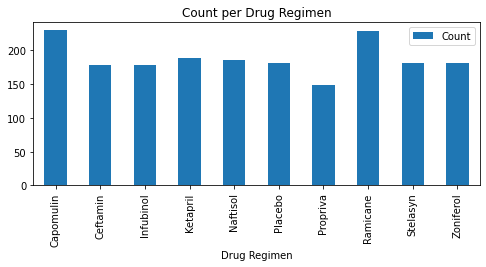

<Figure size 432x288 with 0 Axes>

In [13]:
regimen_datapoints.plot(kind="bar", figsize=(8,3))
plt.title("Count per Drug Regimen")
plt.show()
plt.tight_layout()


In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import matplotlib.pyplot as plt
drug_regimens = summary_df.index.tolist()
drug_regimens


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [14]:
regimen_count = (clean_combine_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [15]:
x_axis = np.arange(len(regimen_count))

([<matplotlib.axis.XTick at 0x7fe28d865580>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

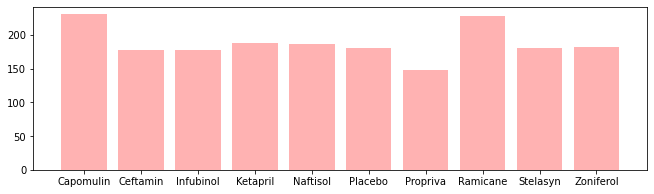

In [20]:
plt.figure(figsize=(11,3))
plt.bar(x_axis, regimen_count, color="r", alpha=0.3, align="center")
tick = [value for value in x_axis]
plt.xticks (tick, drug_regimens)

In [21]:
gender_df = pd.DataFrame(clean_combine_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [22]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,922
1,Male,958


In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

gender_count = (clean_combine_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[922, 958]

In [30]:
labels = ["Females", "Males"]
colors = ["orange", "green"]

([<matplotlib.patches.Wedge at 0x7fe28ea1e550>,
 [Text(-1.1994571897995099, 0.036089469908308275, 'Females'),
  Text(1.0995024239828841, -0.03308201408261557, 'Males')],
 [Text(-0.6996833607163806, 0.02105219077984649, '49.0%'),
  Text(0.5997285948997549, -0.018044734954153943, '51.0%')])

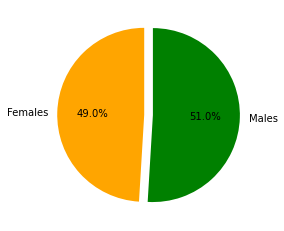

In [33]:
explode = (0.1, 0)
plt.pie (gender_count, explode=explode, labels=labels, colors=colors, autopct= "%1.1f%%", shadow= False, startangle=90)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [34]:
clean_combine_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [39]:
sorted_df = clean_combine_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,b128,Capomulin,Female,9,22,45,38.982878,2
1,1710,b742,Capomulin,Male,7,21,45,38.939633,0
2,1834,g288,Capomulin,Male,3,19,45,37.074024,1
3,1824,g316,Capomulin,Female,22,22,45,40.159220,2
4,1867,i557,Capomulin,Female,1,24,45,47.685963,1


In [40]:
# Capomulin, 
capomulin_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_df.head().reset_index() 

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,b128,Capomulin,Female,9,22,45,38.982878,2
1,1710,b742,Capomulin,Male,7,21,45,38.939633,0
2,1834,g288,Capomulin,Male,3,19,45,37.074024,1
3,1824,g316,Capomulin,Female,22,22,45,40.159220,2
4,1867,i557,Capomulin,Female,1,24,45,47.685963,1


In [44]:
capomulin_list = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
capomulin_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [46]:
quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


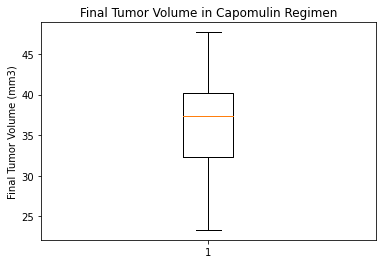

In [48]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()

In [52]:
#Ramicane
ramicane_data_df = last_df[last_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,470,a411,Ramicane,Male,3,22,45,38.407618,1
1,480,a444,Ramicane,Female,10,25,45,43.047543,0
2,584,a520,Ramicane,Male,13,21,45,38.810366,1
3,554,a644,Ramicane,Female,7,17,45,32.978522,1
4,524,c758,Ramicane,Male,9,17,45,33.397653,1


In [54]:
ramicane_list = ramicane_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
ramicane_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [55]:
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


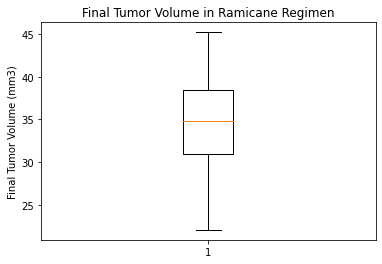

In [57]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane_list)
plt.show()

In [58]:
#Ceftamin
ceftamin_data_df = last_df[last_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1487,a275,Ceftamin,Female,20,28,45,62.999356,3
1,1394,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1477,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1354,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1384,l661,Ceftamin,Male,18,26,45,59.851956,3


In [59]:
ceftamin_list = ceftamin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list = ceftamin_list["Tumor Volume (mm3)"]
ceftamin_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [60]:
quartiles = ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


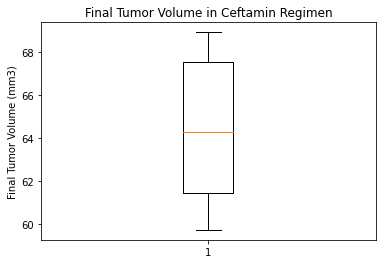

In [61]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin_list)
plt.show()

## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_combine_df.loc[clean_combine_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,b128,Capomulin,Female,9,22,0,45.000000,0
1,1,b128,Capomulin,Female,9,22,5,45.651331,0
2,2,b128,Capomulin,Female,9,22,10,43.270852,0
3,3,b128,Capomulin,Female,9,22,15,43.784893,0
4,4,b128,Capomulin,Female,9,22,20,42.731552,0


In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
28,1691,s185,Capomulin,Female,3,17,0,45.000000,0
29,1692,s185,Capomulin,Female,3,17,5,43.878496,0
30,1693,s185,Capomulin,Female,3,17,10,37.614948,0
31,1694,s185,Capomulin,Female,3,17,15,38.177232,0
32,1695,s185,Capomulin,Female,3,17,20,36.866876,0
33,1696,s185,Capomulin,Female,3,17,25,33.949940,0
34,1697,s185,Capomulin,Female,3,17,30,32.959671,1
35,1698,s185,Capomulin,Female,3,17,35,28.328531,1
36,1699,s185,Capomulin,Female,3,17,40,25.472143,1
37,1700,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

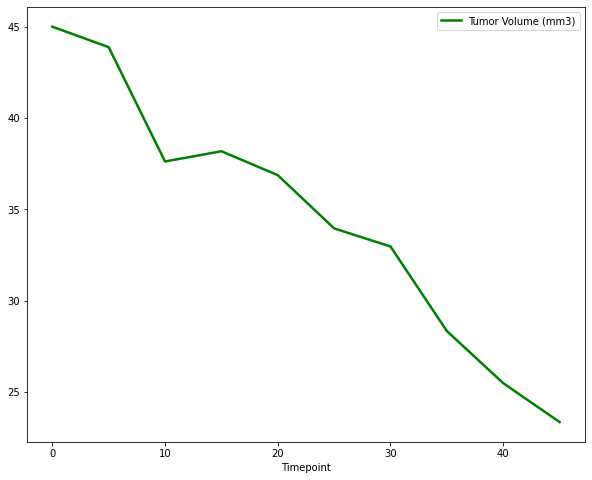

In [66]:

capomulin_single_df = capomulin_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

capomulin_single_df = capomulin_single_df.reset_index(drop=True)

capomulin_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt


In [74]:
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,b128,22,45.651331
2,b128,22,43.270852
3,b128,22,43.784893
4,b128,22,42.731552


In [75]:
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [76]:
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


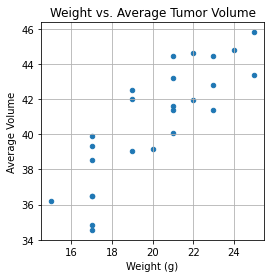

In [77]:
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show() 